<a href="https://colab.research.google.com/github/carol194/imersaodados/blob/main/Imers%C3%A3o_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando biblioteca e dados para analise

import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

In [ ]:
# Nomes das colunas existentes

dados.columns.values

In [ ]:
# Desafio 01: Proporção dos inscritos por idade

dados["NU_IDADE"].value_counts().sort_values(ascending=False) / len(dados)

In [ ]:
# Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.

dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts()

In [ ]:
# Desafio 03: Adicionar título no gráfico

ax = dados["NU_NOTA_REDACAO"].hist(bins = 20)

ax.figure.set_size_inches(12,6)
ax.set_title('Notas de redação', fontsize=18)
ax.set_xlabel('Idade', fontsize=12)
ax.set_ylabel('Frequencia', fontsize=12)

ax=ax

In [ ]:
# Desafio 04: Plotar os Histogramas das idades dos treineiro

ax = dados.query('IN_TREINEIRO == 1')['NU_IDADE'].hist(bins = 50)

ax.figure.set_size_inches(12,6)
ax.set_title('Idade dos treineiros', fontsize=18)
ax.set_xlabel('Idade', fontsize=12)
ax.set_ylabel('Frequencia', fontsize=12)

ax=ax

In [ ]:
# Desafio 04: Plotar os Histogramas das idades dos não treineiros

ax = dados.query('IN_TREINEIRO == 0')['NU_IDADE'].hist(bins = 50)

ax.figure.set_size_inches(12,6)
ax.set_title('Idade dos não treineiros', fontsize=18)
ax.set_xlabel('Idade', fontsize=12)
ax.set_ylabel('Frequencia', fontsize=12)

ax=ax

In [ ]:
# Desafio 05: Comparar as distribuições das provas em inglês

import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(1, 2, constrained_layout=False)

ax0.hist(dados.query('TP_LINGUA == 0')['NU_NOTA_LC'], bins = 50)
ax0.figure.set_size_inches(15,6)
ax0.set_title('Notas da prova de LC (Ingles)', fontsize=18)
ax0.set_xlabel('Notas', fontsize=12)
ax0.set_ylabel('Frequencia', fontsize=12)


# Desafio 05: Comparar as distribuições das provas em espanhol

ax1.hist(dados.query('TP_LINGUA == 1')['NU_NOTA_LC'], bins = 50)

ax1.figure.set_size_inches(15,6)
ax1.set_title('Notas da prova de LC (Espanhol)', fontsize=18)
ax1.set_xlabel('Notas', fontsize=12)
ax1.set_ylabel('Frequencia', fontsize=12)


In [34]:
# Desafio 06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

# Minas Gerais

# 160 pessoas que residem em MG, não fizeram a prova no estado.
dados.query('CO_UF_RESIDENCIA	== 31 & CO_UF_PROVA	!= 31')['CO_UF_PROVA'].unique()


array([29, 32, 33, 35, 11, 43, 50, 52, 53, 41, 21, 25, 26, 28])

In [36]:
dados.query('CO_UF_RESIDENCIA	== 31 & CO_UF_PROVA	!= 31')['SG_UF_PROVA'].value_counts()

SP    58
BA    37
GO    18
RJ    18
ES    12
PR     4
MS     4
DF     3
RO     1
RS     1
PB     1
MA     1
SE     1
PE     1
Name: SG_UF_PROVA, dtype: int64

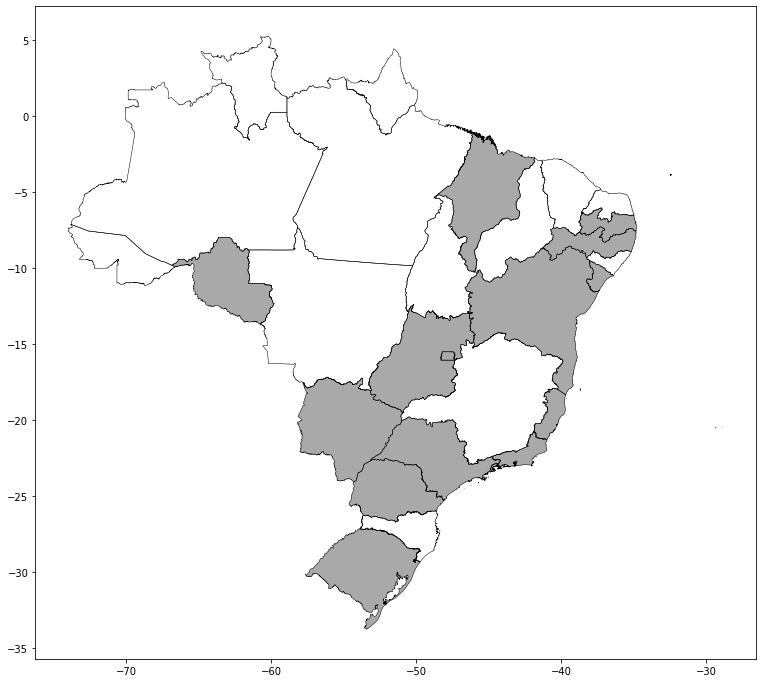

In [17]:
%matplotlib inline
# !pip install geopandas
# !pip install descartes
import geopandas as gpd

# Carregando o arquivo do mapa do Brasil.
brasil = gpd.read_file('BRUFE250GC_SIR.shx')

# Separando os estados.
naomg = brasil[brasil['CD_GEOCUF'].isin(['29', '32', '33', '35', '11', '43', '50', '52', '53', '41', '21', '25', '26', '28'])]

# Plotando somente as fronteiras do país.
fronteirabrasil = brasil.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)

# Estados onde os 160 alunos realizaram a prova. 
naomg.plot(ax=fronteirabrasil, color='DarkGray')